In [1]:
import numpy as np
import sys
sys.path.append('./ckplotlib/')
import map_funcs
from IPython.display import Image
#
import smoothlib
import xarray as xr
import geog_funcs
from scipy.io import netcdf

1.6.1


In [2]:
exps_list = ('ssp585','ssp534-over')
models_list = ('CanESM5','UVic')
vars_list = ('tas','fgco2','nbp')
gridvars_list = ('areacella','areacello','sftlf','sftof')

nmodels = len(models_list)
nvars = len(vars_list)
nexps = len(exps_list)
ngridvars = len(gridvars_list)


file_master_list_dynamics = [[[[] for i in range(nexps )] for j in range(nvars)] for k in range(nmodels)]
### index this file as [model_i][var_i][exp_i]

file_master_list_grids = [[[] for j in range(ngridvars)] for k in range(nmodels)]
### index this file as [model_i][gridvar_i]

time_offset = [0,25]
nyears_total = 2300-2015+1


In [3]:
### load all the files for CanESM5

model_i = models_list.index('CanESM5')

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('ssp585')] = [
'tas_Amon_CanESM5_ssp585_r1i1p1f1_gn_201501-210012.nc',
'tas_Amon_CanESM5_ssp585_r1i1p1f1_gn_210101-218012.nc',
'tas_Amon_CanESM5_ssp585_r1i1p1f1_gn_218101-230012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('ssp585')] = [
'fgco2_Oyr_CanESM5_ssp585_r1i1p1f1_gn_2015-2100.nc',
'fgco2_Oyr_CanESM5_ssp585_r1i1p1f1_gn_2101-2180.nc',
'fgco2_Oyr_CanESM5_ssp585_r1i1p1f1_gn_2181-2300.nc'
]

file_master_list_dynamics[model_i][vars_list.index('nbp')][exps_list.index('ssp585')] = [
'nbp_Lmon_CanESM5_ssp585_r1i1p1f1_gn_201501-210012.nc',
'nbp_Lmon_CanESM5_ssp585_r1i1p1f1_gn_210101-218012.nc',
'nbp_Lmon_CanESM5_ssp585_r1i1p1f1_gn_218101-230012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('ssp534-over')] = [
'tas_Amon_CanESM5_ssp534-over_r1i1p1f1_gn_204001-210012.nc',
'tas_Amon_CanESM5_ssp534-over_r1i1p1f1_gn_210101-230012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('ssp534-over')] = [
'fgco2_Oyr_CanESM5_ssp534-over_r1i1p1f1_gn_2040-2100.nc',
'fgco2_Oyr_CanESM5_ssp534-over_r1i1p1f1_gn_2101-2300.nc'
]

file_master_list_dynamics[model_i][vars_list.index('nbp')][exps_list.index('ssp534-over')] = [
'nbp_Lmon_CanESM5_ssp534-over_r1i1p1f1_gn_204001-210012.nc',
'nbp_Lmon_CanESM5_ssp534-over_r1i1p1f1_gn_210101-230012.nc'
]

file_master_list_grids[model_i] = [
'areacella_fx_CanESM5_dcppA-hindcast_s1965-r7i1p2f1_gn.nc',
'areacello_Ofx_CanESM5_dcppA-hindcast_s1965-r7i1p2f1_gn.nc',
'sftlf_fx_CanESM5_dcppA-hindcast_s1965-r7i1p2f1_gn.nc',
'sftof_Ofx_CanESM5_dcppA-hindcast_s1965-r8i1p2f1_gn.nc'
]

In [4]:
### load all the files for UVic

model_i = models_list.index('UVic')

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('ssp585')] = 'tsi_585_c3.nc'

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('ssp585')] = 'tsi_585_c3.nc'

file_master_list_dynamics[model_i][vars_list.index('nbp')][exps_list.index('ssp585')] = 'tsi_585_c3.nc'

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('ssp534-over')] = 'tsi_534OS_c3.nc'

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('ssp534-over')] = 'tsi_534OS_c3.nc'

file_master_list_dynamics[model_i][vars_list.index('nbp')][exps_list.index('ssp534-over')] = 'tsi_534OS_c3.nc'

## The lack of a grid here is going to be used to indicate that the data is already 
## globally integrated.
file_master_list_grids[model_i] = [
None
]

In [5]:
### load the terrestrial NBP flux
i_var = vars_list.index('nbp')
nbp_trajectories = np.ma.masked_all([nmodels,nexps,nyears_total])
for model_i in range(nmodels):
    print(models_list[model_i])
    #
    try:
        # load landmask and land areas
        areavar = xr.open_dataset(file_master_list_grids[model_i][gridvars_list.index('areacella')])['areacella']
        #print(areavar)
        sftlfvar = xr.open_dataset(file_master_list_grids[model_i][gridvars_list.index('sftlf')])['sftlf']
        #print(sftlfvar)
        globally_gridded = True
    except:
        globally_gridded = False
    #
    print('globally_gridded', globally_gridded)
    for exp_i in range(nexps):
        if globally_gridded:
            dataset = xr.open_mfdataset(file_master_list_dynamics[model_i][i_var][exp_i])
            nbpvar = dataset['nbp']
            print(nbpvar)
            global_nbp = (nbpvar * sftlfvar/100. * areavar).sum(dim="lat").sum(dim="lon") * 86400. * 365. * 1e3 * 1e-15
            print(global_nbp.values.shape)
            global_nbp_annual = smoothlib.monthly_to_annual(global_nbp.values)
            nbp_trajectories[model_i,exp_i,time_offset[exp_i]:] = smoothlib.boxcar_smoother(global_nbp_annual, window=7)
        else:
            dataset = netcdf.netcdf_file(file_master_list_dynamics[model_i][i_var][exp_i])
            global_nbp_annual = dataset.variables['F_carba2l']
            nbp_trajectories[model_i,exp_i,time_offset[exp_i]:] = smoothlib.boxcar_smoother(global_nbp_annual[time_offset[exp_i]:nyears_total], window=7)

CanESM5
globally_gridded True
<xarray.DataArray 'nbp' (time: 3432, lat: 64, lon: 128)>
dask.array<shape=(3432, 64, 128), dtype=float32, chunksize=(1032, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time     (time) object 2015-01-16 12:00:00 ... 2300-12-16 12:00:00
Attributes:
    standard_name:  surface_net_downward_mass_flux_of_carbon_dioxide_expresse...
    long_name:      Carbon Mass Flux out of Atmosphere Due to Net Biospheric ...
    comment:        up is changed to down! CFNB*12.011E-9, ScenarioMIP_table_...
    units:          kg m-2 s-1
    original_name:  CFNB
    cell_methods:   area: mean where land time: mean
    cell_measures:  area: areacella


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


(3432,)


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


<xarray.DataArray 'nbp' (time: 3132, lat: 64, lon: 128)>
dask.array<shape=(3132, 64, 128), dtype=float32, chunksize=(732, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time     (time) object 2040-01-16 12:00:00 ... 2300-12-16 12:00:00
Attributes:
    standard_name:  surface_net_downward_mass_flux_of_carbon_dioxide_expresse...
    long_name:      Carbon Mass Flux out of Atmosphere Due to Net Biospheric ...
    comment:        up is changed to down! CFNB*12.011E-9, ScenarioMIP_table_...
    units:          kg m-2 s-1
    original_name:  CFNB
    cell_methods:   area: mean where land time: mean
    cell_measures:  area: areacella
(3132,)
UVic
globally_gridded False


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/scipy/io/netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


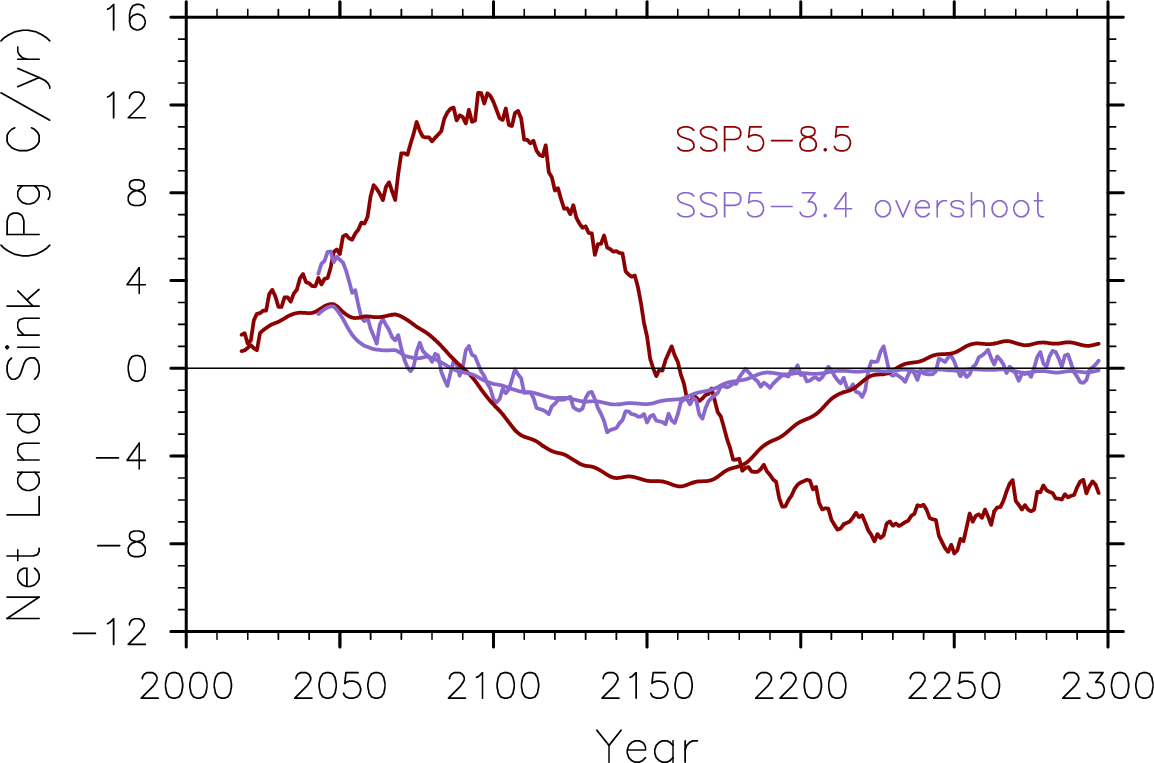

In [6]:
years = np.arange(nyears_total)+2015.
map_funcs.xyplot(years, nbp_trajectories[:,:,:].reshape((nmodels*nexps,nyears_total)), file='nbp_longterm', showjupyter=True,  png_dens=200, colors=['Red4','MediumPurple3']*nmodels, labels=['SSP5-8.5','SSP5-3.4 overshoot'],xtitle='Year',ytitle='Net Land Sink (Pg C/yr)', label_xstart=2160, label_yspace=3, aspect_ratio=1.5, hline=0., xrange=[2000.,2300.])



In [7]:
### load the ocean fgco2 flux
i_var = vars_list.index('fgco2')
fgco2_trajectories = np.ma.masked_all([nmodels,nexps,nyears_total])
for model_i in range(nmodels):
    print(models_list[model_i])
    #
    try:
        # load landmask and land areas
        area_ocean_var = xr.open_dataset(file_master_list_grids[model_i][gridvars_list.index('areacello')])['areacello']
        #print(areavar)
        sftofvar = xr.open_dataset(file_master_list_grids[model_i][gridvars_list.index('sftof')])['sftof']
        #print(sftlfvar)
        globally_gridded = True
    except:
        globally_gridded = False
    #
    for exp_i in range(nexps):
        if globally_gridded:
            dataset = xr.open_mfdataset(file_master_list_dynamics[model_i][i_var][exp_i])
            fgco2var = dataset['fgco2']
            print(fgco2var)
            global_fgco2_annual = (fgco2var * sftofvar/100. * area_ocean_var).sum(dim="i").sum(dim="j") * 86400. * 365. * 1e3 * 1e-15
            fgco2_trajectories[model_i,exp_i,time_offset[exp_i]:] = global_fgco2_annual
        else:
            dataset = netcdf.netcdf_file(file_master_list_dynamics[model_i][i_var][exp_i])
            global_fgco2_annual = dataset.variables['F_carba2o']
            fgco2_trajectories[model_i,exp_i,time_offset[exp_i]:] = global_fgco2_annual[time_offset[exp_i]:nyears_total]

CanESM5
<xarray.DataArray 'fgco2' (time: 286, j: 291, i: 360)>
dask.array<shape=(286, 291, 360), dtype=float32, chunksize=(86, 291, 360)>
Coordinates:
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 -78.39 -78.39 -78.39 -78.39 ... 50.51 50.23 50.01
    longitude  (j, i) float64 73.5 74.5 75.5 76.5 ... 72.93 72.95 72.96 72.99
  * time       (time) object 2015-07-02 12:00:00 ... 2300-07-02 12:00:00
Attributes:
    standard_name:  surface_downward_mass_flux_of_carbon_dioxide_expressed_as...
    long_name:      Surface Downward Flux of Total CO2
    comment:        Gas exchange flux of CO2 (positive into ocean)
    units:          kg m-2 s-1
    original_name:  Cflx
    history:        meanm2y_mltby0.012
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/scipy/io/netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such 

<xarray.DataArray 'fgco2' (time: 261, j: 291, i: 360)>
dask.array<shape=(261, 291, 360), dtype=float32, chunksize=(61, 291, 360)>
Coordinates:
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 -78.39 -78.39 -78.39 -78.39 ... 50.51 50.23 50.01
    longitude  (j, i) float64 73.5 74.5 75.5 76.5 ... 72.93 72.95 72.96 72.99
  * time       (time) object 2040-07-02 12:00:00 ... 2300-07-02 12:00:00
Attributes:
    standard_name:  surface_downward_mass_flux_of_carbon_dioxide_expressed_as...
    long_name:      Surface Downward Flux of Total CO2
    comment:        Gas exchange flux of CO2 (positive into ocean)
    units:          kg m-2 s-1
    original_name:  Cflx
    history:        meanm2y_mltby0.012
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
UVic


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/scipy/io/netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


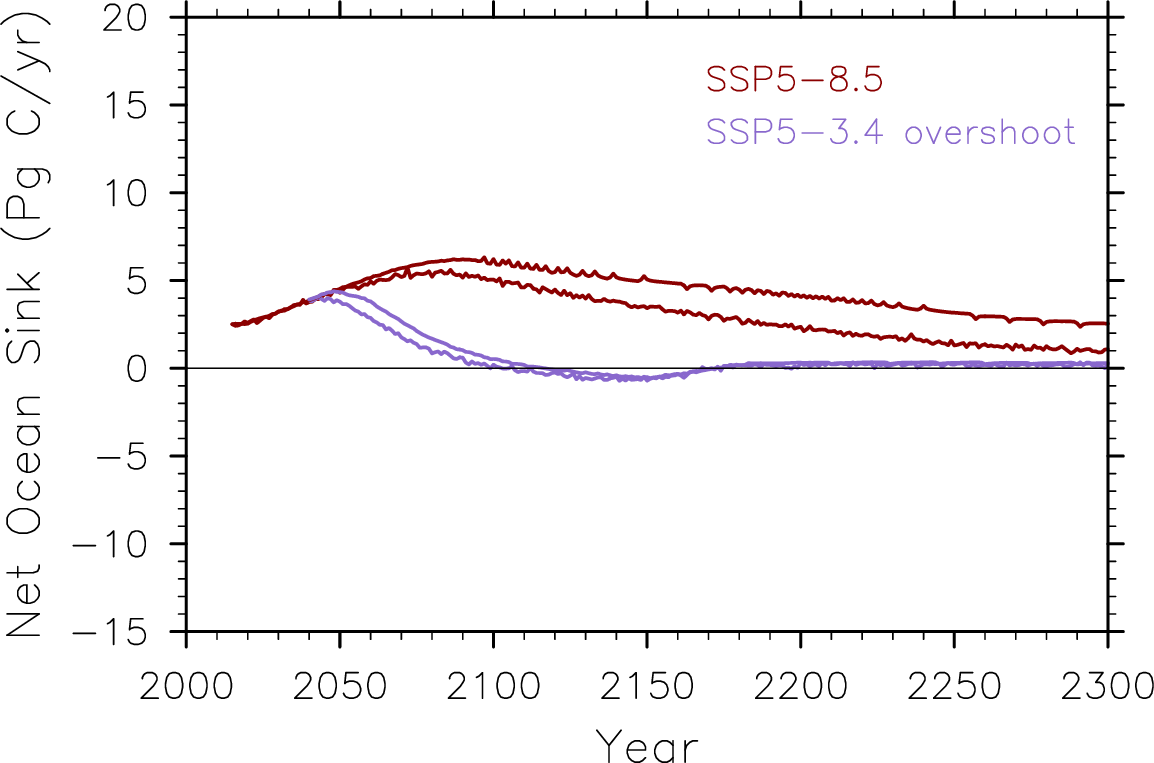

In [8]:
map_funcs.xyplot(years, fgco2_trajectories[:,:,:].reshape((nmodels*nexps,nyears_total)), file='fgco2_longterm', showjupyter=True,  png_dens=200, colors=['Red4','MediumPurple3']*nmodels, labels=['SSP5-8.5','SSP5-3.4 overshoot'],xtitle='Year',ytitle='Net Ocean Sink (Pg C/yr)', label_xstart=2170, label_yspace=3, aspect_ratio=1.5, hline=0., yrange=[-15.,20.], xrange=[2000.,2300.])
